## python work sheet 6
- name -> chirag taneja
- group -> 2W13(RAI)
- roll_no -> 102323072

### Q1. This project involves analysing the marks of students across multiple subjects. The goal is to generate and analyse data, including calculating total marks, average marks, subject-wise performance, and identifying top and bottom performers. You will also determine the passing percentage and generate insights based on students' performance using plots.

Student Name | Math | Physics | Chemistry | English
-------------|------|---------|-----------|--------
Arin         | 85   | 78      | 92        | 88
Aditya       | 79   | 82      | 74        | 90
Chirag       | 90   | 85      | 89        | 92
Gurleen      | 66   | 75      | 80        | 78
Kunal        | 70   | 68      | 75        | 85

Student Data:
Arin: [85 78 92 88] Total: 343 Average: 85.75
Aditya: [79 82 74 90] Total: 325 Average: 81.25
Chirag: [90 85 89 92] Total: 356 Average: 89.00
Gurleen: [66 75 80 78] Total: 299 Average: 74.75
Kunal: [70 68 75 85] Total: 298 Average: 74.50

Top performer: Chirag
Bottom performer: Kunal
Passing percentage: 100.00%

Subject-wise average performance:
Math: 78.00
Physics: 77.60
Chemistry: 82.00
English: 86.60


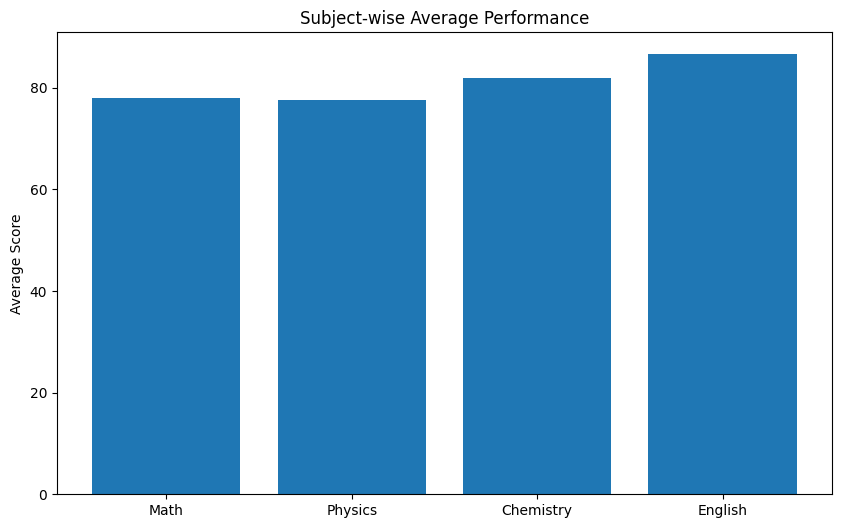

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create arrays for student data
student_names = np.array(['Arin', 'Aditya', 'Chirag', 'Gurleen', 'Kunal'])
subjects = np.array(['Math', 'Physics', 'Chemistry', 'English'])
marks = np.array([
    [85, 78, 92, 88],
    [79, 82, 74, 90],
    [90, 85, 89, 92],
    [66, 75, 80, 78],
    [70, 68, 75, 85]
])

# Calculate total and average marks
total_marks = np.sum(marks, axis=1)
average_marks = np.mean(marks, axis=1)

# Identify top and bottom performers
top_performer = student_names[np.argmax(total_marks)]
bottom_performer = student_names[np.argmin(total_marks)]

# Print student data
print("Student Data:")
for i, student in enumerate(student_names):
    print(f"{student}: {marks[i]} Total: {total_marks[i]} Average: {average_marks[i]:.2f}")

print(f"\nTop performer: {top_performer}")
print(f"Bottom performer: {bottom_performer}")

# Calculate passing percentage (assuming passing mark is 60)
passing_percentage = np.mean(np.all(marks >= 60, axis=1)) * 100
print(f"Passing percentage: {passing_percentage:.2f}%")

# Subject-wise performance
subject_averages = np.mean(marks, axis=0)
print("\nSubject-wise average performance:")
for subject, avg in zip(subjects, subject_averages):
    print(f"{subject}: {avg:.2f}")

# Visualize subject-wise performance
plt.figure(figsize=(10, 6))
plt.bar(subjects, subject_averages)
plt.title('Subject-wise Average Performance')
plt.ylabel('Average Score')
plt.show()

### Q2. You are provided with the following data for the velocity of an object over time. The velocity data is modelled by a quadratic function of the form v(t)=at^2+bt+c, where v(t) is the velocity at time t, and a, b, and c are constants to be determined using curve fitting. (Using SciPy's Curve fitting). Plot the original data and curve obtained in one plot with all the features of plot.

Time (Seconds) | 0 | 1 | 2 | 3 | 4 | 5
----------------|---|---|---|---|---|---
Velocity (m/s)  | 2 | 3.1 | 7.9 | 18.2 | 34.3 | 56.2

Fitted Parameters: a=2.66, b=-2.61, c=2.39


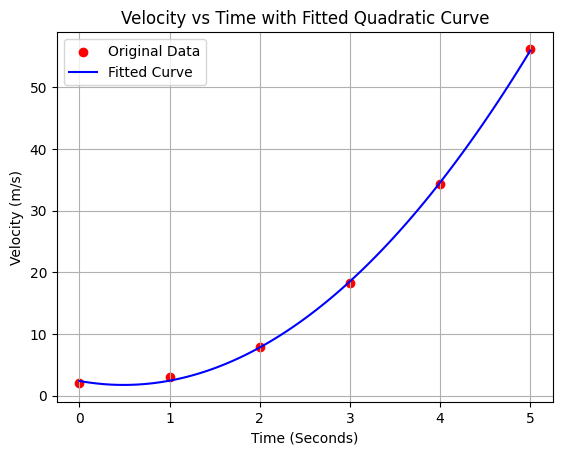

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given Data
time = np.array([0, 1, 2, 3, 4, 5])
velocity = np.array([2, 3.1, 7.9, 18.2, 34.3, 56.2])

# Defining the quadratic function
def v(t, a, b, c):
    return a*t**2 + b*t + c

# Curve Fitting
params, covariance = curve_fit(v, time, velocity)
a, b, c = params
print(f"Fitted Parameters: a={a:.2f}, b={b:.2f}, c={c:.2f}")

# Generating points for the fitted curve
t_fit = np.linspace(0, 5, 100)
v_fit = v(t_fit, a, b, c)

# Plotting
plt.scatter(time, velocity, label='Original Data', color='red')
plt.plot(t_fit, v_fit, label='Fitted Curve', color='blue')
plt.title('Velocity vs Time with Fitted Quadratic Curve')
plt.xlabel('Time (Seconds)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()

### Q3. You are given the following data representing the population of a town in various years:

S. No. | Year | Population (in thousands)
-------|------|---------------------------
1      | 2000 | 50
2      | 2005 | 55
3      | 2010 | 70
4      | 2015 | 80
5      | 2020 | 90

What is the Pearson's correlation coefficient for the above data? Estimate the population of the town in the year 2008 using linear interpolation/regression equation based on Table 1 data. Write Python code to perform the interpolation using Scipy functions and plot it.

Pearson's Correlation Coefficient: 0.9922
Regression Equation: Population = 2.10 * Year + -4152.00
Estimated Population in 2008: 64.80 thousand
Interpolated Population in 2008: 64.00 thousand


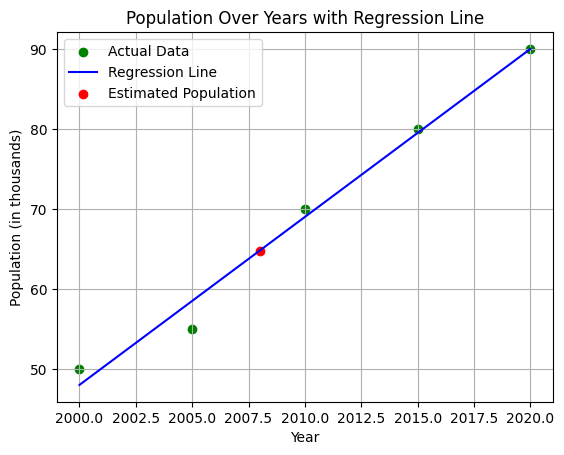

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import interpolate

# Given Data
years = np.array([2000, 2005, 2010, 2015, 2020])
population = np.array([50, 55, 70, 80, 90])  # in thousands

# Calculating Pearson's Correlation Coefficient
corr_coef, p_value = pearsonr(years, population)
print(f"Pearson's Correlation Coefficient: {corr_coef:.4f}")

# Linear Regression for Estimation
slope, intercept = np.polyfit(years, population, 1)
print(f"Regression Equation: Population = {slope:.2f} * Year + {intercept:.2f}")

# Estimating Population for 2008
year_estimate = 2008
population_estimate = slope * year_estimate + intercept
print(f"Estimated Population in {year_estimate}: {population_estimate:.2f} thousand")

# Interpolation using SciPy
linear_interp = interpolate.interp1d(years, population, kind='linear')
population_interp = linear_interp(year_estimate)
print(f"Interpolated Population in {year_estimate}: {population_interp:.2f} thousand")

# Plotting
plt.scatter(years, population, label='Actual Data', color='green')
plt.plot(years, slope*years + intercept, label='Regression Line', color='blue')
plt.scatter(year_estimate, population_estimate, label='Estimated Population', color='red')
plt.title('Population Over Years with Regression Line')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.grid(True)
plt.show()

### Q4. Consider the polynomial equation p(x)=3x^3−5x^2+2x−8

1. Use SciPy to find the roots of the polynomial.
2. Plot the polynomial function p(x) for the range of x from -3 to 3 and mark the roots on the plot.

Roots of the polynomial p(x):
(2.000000000000003+0j)
(-0.16666666666666685+1.1426091000668415j)
(-0.16666666666666685-1.1426091000668415j)


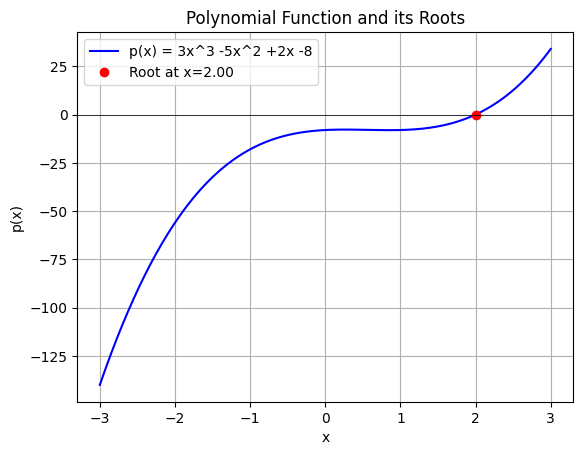

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Defining the polynomial coefficients for p(x) = 3x^3 -5x^2 +2x -8
coeffs = [3, -5, 2, -8]  # Note: Highest degree first
p = np.poly1d(coeffs)

# Finding the roots
roots = p.roots
print("Roots of the polynomial p(x):")
for root in roots:
    print(root)

# Generating x values
x = np.linspace(-3, 3, 400)
y = p(x)

# Plotting the polynomial
plt.plot(x, y, label='p(x) = 3x^3 -5x^2 +2x -8', color='blue')

# Marking the real roots
real_roots = roots[np.isreal(roots)].real
for root in real_roots:
    plt.plot(root, p(root), 'ro', label=f'Root at x={root:.2f}')

plt.title('Polynomial Function and its Roots')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

### Q5. Compare the performance (time taken) of Python programs.

1. Convert 200MB, 400 MB, 600 MB, 800 MB, and 1000MB text files to upper case.
2. Generate a file with random text of all the MBs and convert it into upper case and check time and plot.

In [ ]:
### a little bit confusion how can i solve this question

### Q6. Consider the function f(x) = x^4−3x^3+2.

1. Use SciPy to find the local minima of the function.
2. Plot the function f(x) over the range x = [−2,3] and mark the local minima on the plot.

Local Minima at x values:
x = 2.25, f(x) = -6.54
x = 2.25, f(x) = -6.54


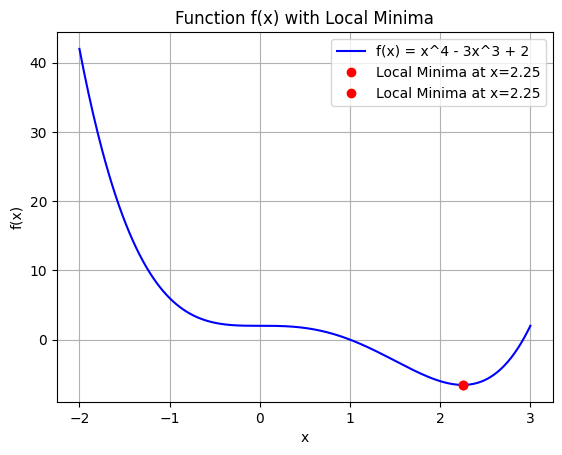

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Defining the function and its derivative
def f(x):
    return x**4 - 3*x**3 + 2

def f_prime(x):
    return 4*x**3 - 9*x**2

# Finding critical points where f'(x) = 0
critical_points = fsolve(f_prime, x0=[0, 2, 3])

# Determining which critical points are minima
minima = []
for point in critical_points:
    second_derivative = 12*point**2 - 18*point
    if second_derivative > 0:
        minima.append(point)

print("Local Minima at x values:")
for x_min in minima:
    print(f"x = {x_min:.2f}, f(x) = {f(x_min):.2f}")

# Generating x values for plotting
x = np.linspace(-2, 3, 400)
y = f(x)

# Plotting the function
plt.plot(x, y, label='f(x) = x^4 - 3x^3 + 2', color='blue')

# Marking the local minima
for x_min in minima:
    plt.plot(x_min, f(x_min), 'ro', label=f'Local Minima at x={x_min:.2f}')

plt.title('Function f(x) with Local Minima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()